<a href="https://colab.research.google.com/github/SiriN1234/Python_Learning_google_colab/blob/main/chapter_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처 : 혼자 공부하는 머신러닝+딥러닝

# PCA

- 차원축소의 개념
- PCA 개념
- 과일 사진의 경우, 10,000개의 픽셀 (높이 x 너비)
- 10,000개의 특성이 있는 셈 (차원)
- 정형데이터에서도 활용 가능
  + 문자열 데이터, 수치형 데이터 (연속형 데이터, 비연속형 데이터)
  + 캐글 대회 : 수치형 컬럼 304개
    + 연산은 RAM에서 처리
    + 라면을 5개 끓여야 함 / 냄비 크기는 3개가 max

### 차원축소 = 일부 특성을 선택하여 데이터 크기를 줄임

- 머신러닝 측면 : 과대적합 방지 & 성능 향상

- 양적 데이터 사이의 분산 - 공분산 관계를 애용해서 선형결합으로 표시되는 주성분을 찾음
- 2-3개의 주성분으로 전체 변동을 찾는 것이 PCA

- p. 326
- 그래프를 보면, 처음 10개의 주성분이 (10,000개의 픽셀)

- 알고리즘을 구성 할 때, 필요한 데이터 픽셀 수, 300 * 10,000개 픽셀
- 원래는 300 x PCA 10개의 주성분으로 줄임
- 기존 1시간 걸릴 것이 10분 걸림
- 그럼에도 불구하고, 분류가 더 잘 되더라

# PCA 클래스

## 데이터 불러오기

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-31 06:15:56--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 06:15:56--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 06:15:57--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

- 배열로 업로드

In [3]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)
fruits_2d.shape

(300, 10000)

- sklearn.decomposition 모듈

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
print(pca.components_.shape)

(50, 10000)


- 그래프 그리기

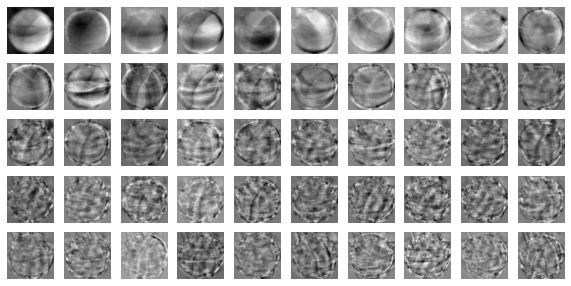

In [7]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [8]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- 데이터의 원래 크기 대비해서 1/200로 줄임
- 용량이 줄었다는 것과 똑같음

# 원본 데이터 재구성

- 10,000개의 특성을 50개로 줄임
- 100% 재구성은 어렵지만, 그래도 쓸만하다

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
print(fruits_reconstruct.shape)

(300, 100, 100)


## 그래프 작성

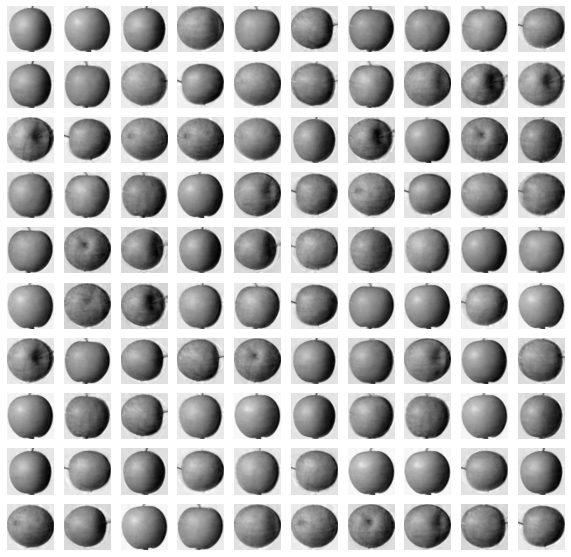

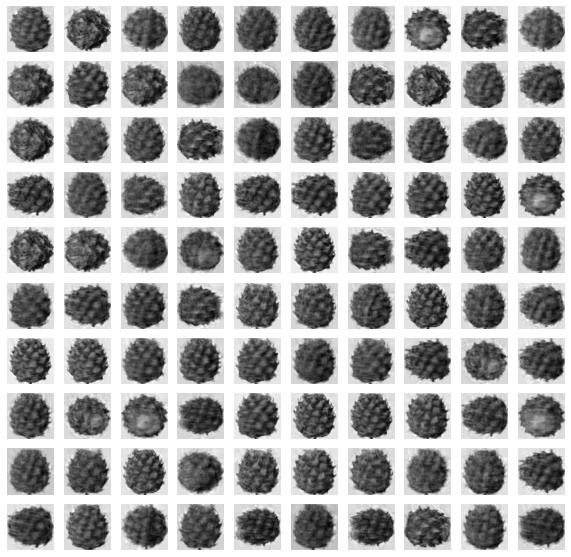

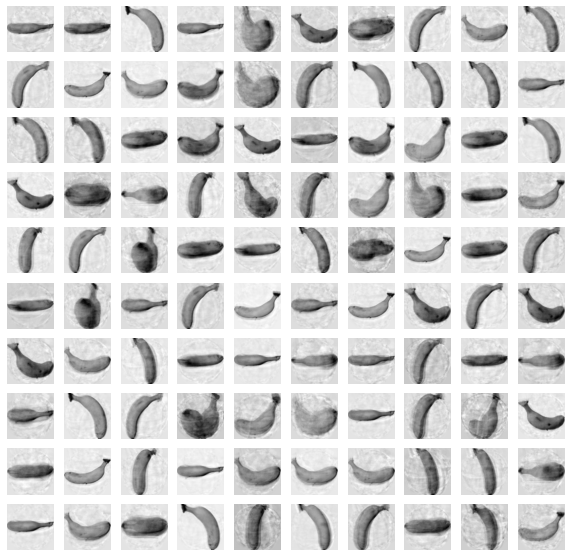

In [13]:
for start in [0, 100, 200] :
  draw_fruits(fruits_reconstruct[start:start + 100])
  print("\n")

# 설명된 분산

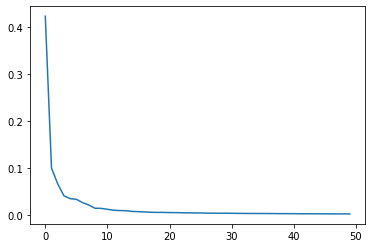

In [14]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 처음 10개의 주성분이 대부분의 분산을 표현한다
- 11개 주성분부터 ~ 50개까지는 잘 설명이 안됨

In [15]:
print(np.sum(pca.explained_variance_ratio_))

0.9215509156198924


# 다름 알고리즘과 함꼐 사용하기

- 3개의 과일 사진 분류 위해 로지스틱 회귀 사용

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# 타깃값 생성
target = np.array([0] * 100 + [1] * 100 + [2] * 100)
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


- 교차검증 진행
- PCA 수행 전, RAW DATA

In [17]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.433236312866211


- PCA 수행 후, 학습 시간 비교

In [18]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.06142778396606445


- 주 성분의 매개변수 개수 지정, 분산비율 지정

In [23]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


- 주 성분을 2개로 압축시킴

In [24]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [25]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9933333333333334
0.08337922096252441


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


- 차원 축소된 데이터를 K-평균 알고리즘에 추가

In [27]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


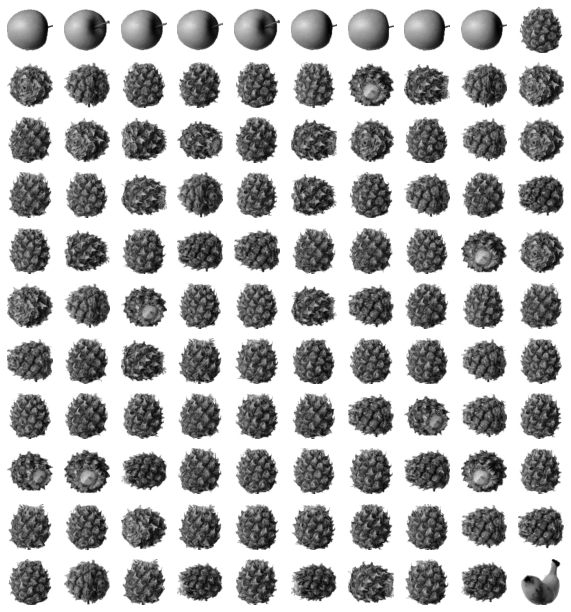

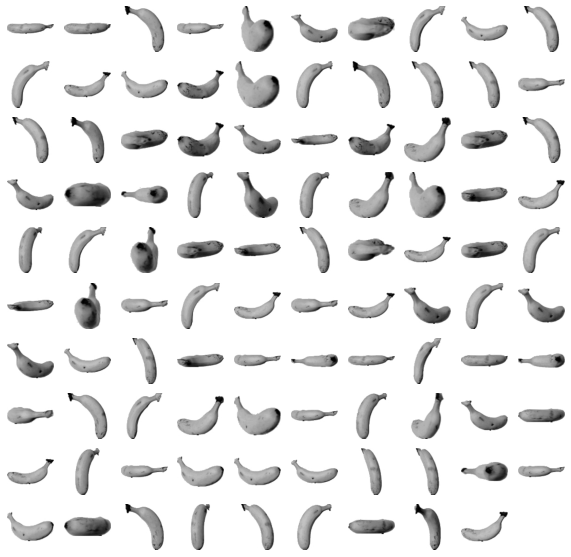

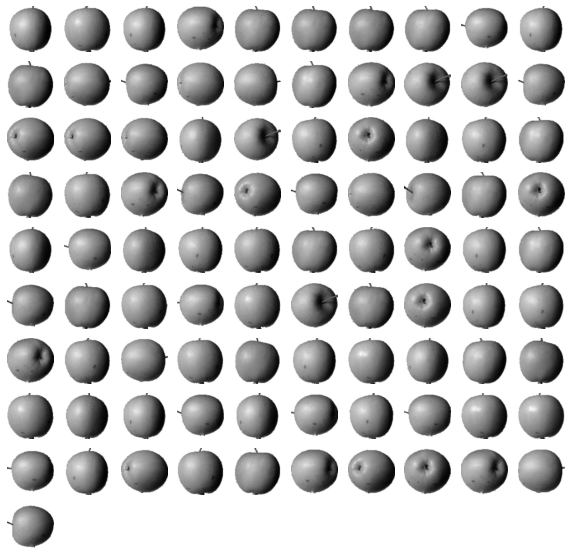

In [28]:
for label in range(0, 3) :
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

- 시각화로 뿌려주기

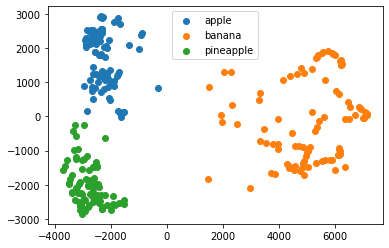

In [29]:
for label in range(0, 3) :
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])

plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

# 마무리

## 키워드로 끝내는 핵심 포인트

- **차원 축소**는 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류입니다. 차원 숙소는 저장 공간을 줄이고 시각화하기 쉽습니다. 또한 다른 알고리즘의 성능을 높일 수 있습니다.
- **주성분 분석**은 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법입니다. 이런 방향을 주성분이라고 부릅니다. 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있습니다. 일반적으로 주성분은 원본 데이터에 있는 특성 개수보다 작습니다.
- **설명된 분산**은 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것입니다. 사이킷런의 PCA 클래스는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있습니다.

## 핵심 패키지와 함수

### scikit-learn

- **PCA**는 주성분 분석을 수행하는 클래스입니다.
  + n_components는 주성분의 개수를 지정합니다. 기본값은 None으로 샘플 개수와 특성 개수 중에 작은 것의 값을 사용합니다.
  + random_state에는 넘파이 난수 시드 값을 지정할 수 있습니다.
  + components_ 속성에는 훈련 세트에서 찾은 주성분이 저장됩니다.
  + explained_variance_ 속성에는 설명된 분산이 저장되고, explained_variance_ratio_에는 설명된 분산의 비율이 저장됩니다.
  + inverse_transform() 메서드는 transform() 메서드로 차원을 축소시킨 데이터를 다시 원본 차원으로 복원합니다.